In [136]:
%config IPCompleter.greedy=True

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [138]:
data = pd.read_csv('data/hll.csv')
data['estimated/n'] = data['estimated'] / data['n']
data
# 130k - hash, 10k - b

,hash,b,n,expected,estimated,estimated/n
0,md5,4,1,1,1,1.000000
1,md5,4,2,2,2,1.000000
2,md5,4,3,3,3,1.000000
3,md5,4,4,4,4,1.000000
4,md5,4,5,5,4,0.800000
...,...,...,...,...,...,...
519995,sha512,16,9996,9996,9982,0.998599
519996,sha512,16,9997,9997,9979,0.998199
519997,sha512,16,9998,9998,10007,1.000900
519998,sha512,16,9999,9999,10028,1.002900


# Porównanie różnych rozmiarów tablicy rejestrów

Na wykresach zaprezentowano funkcję haszującą `SHA256` dla zbiorów rozmiaru $n = 1, \ldots, 10^4$ i tablicy rejestrów rozmiaru $2^b$, gdzie $b = 4, \ldots, 16$.

In [139]:
data_sha256 = data[260000:390000]
data_sha256

,hash,b,n,expected,estimated,estimated/n
260000,sha256,4,1,1,1,1.000000
260001,sha256,4,2,2,2,1.000000
260002,sha256,4,3,3,2,0.666667
260003,sha256,4,4,4,4,1.000000
260004,sha256,4,5,5,5,1.000000
...,...,...,...,...,...,...
389995,sha256,16,9996,9996,9980,0.998399
389996,sha256,16,9997,9997,9996,0.999900
389997,sha256,16,9998,9998,10005,1.000700
389998,sha256,16,9999,9999,10006,1.000700


In [140]:
n = 10000
bs = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

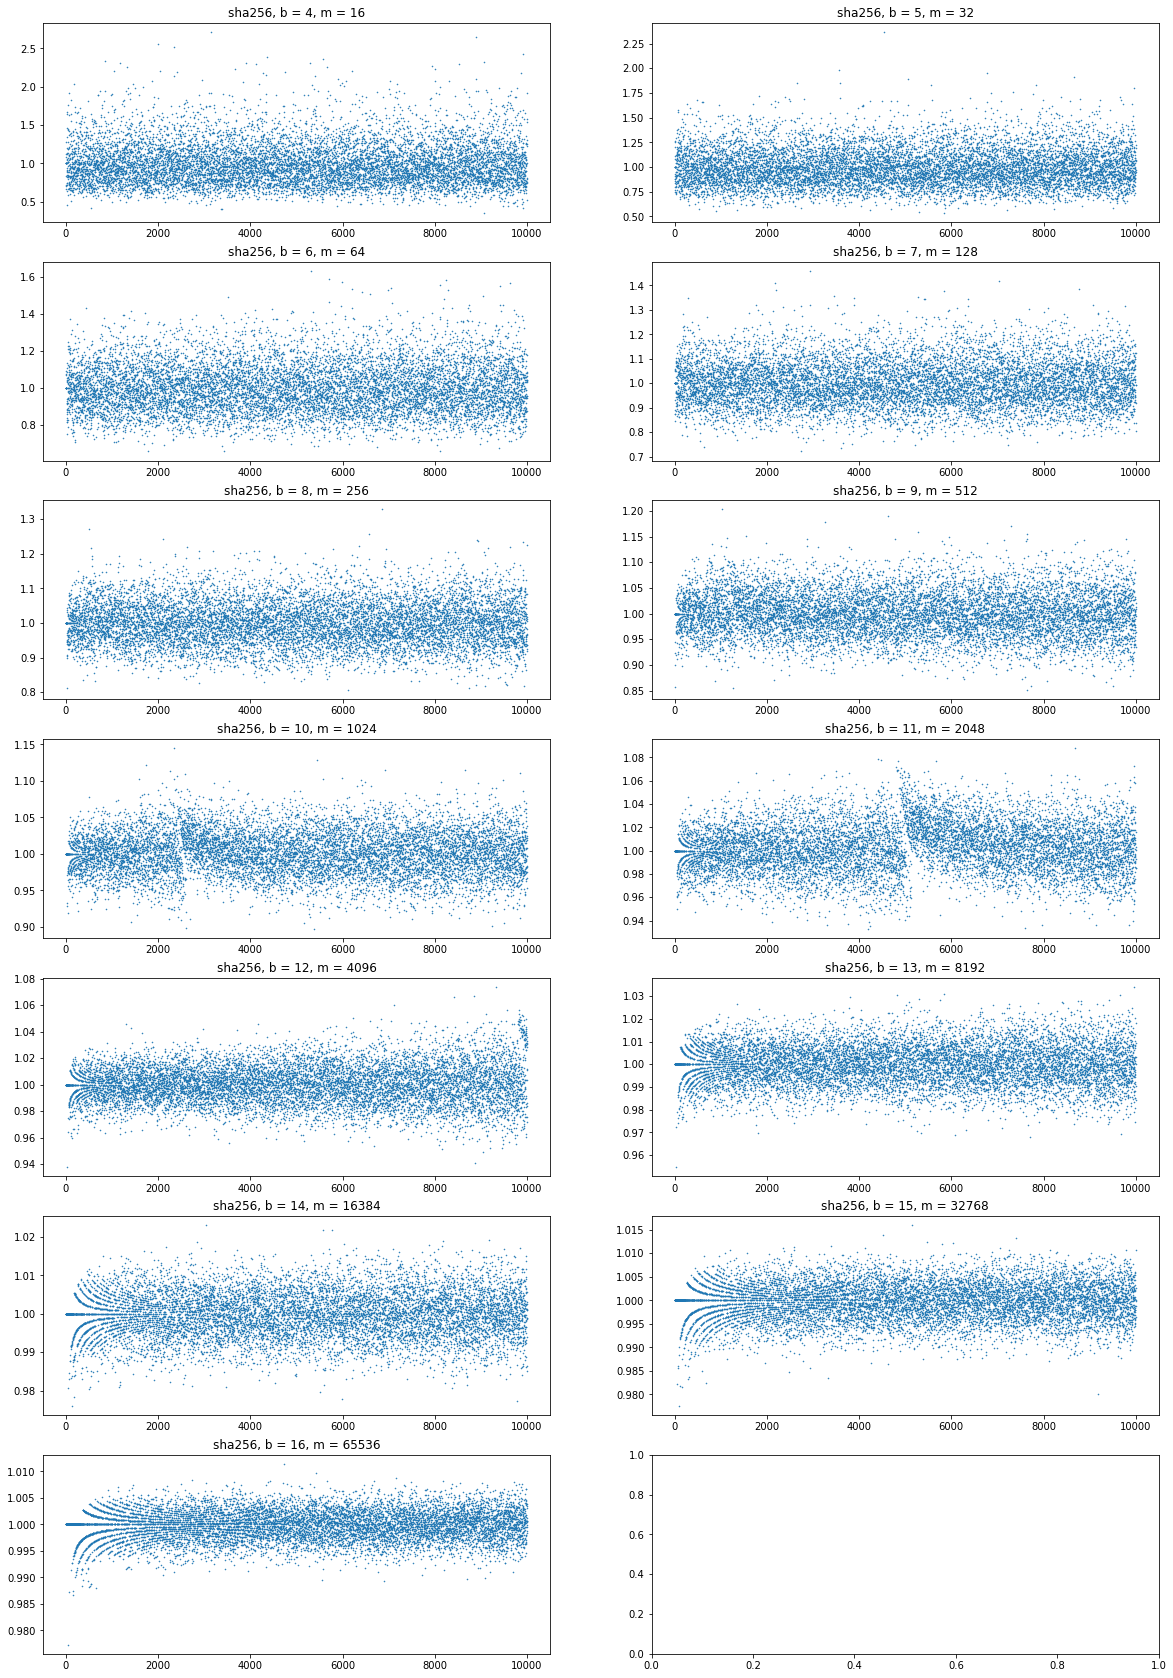

In [141]:
x = np.linspace(1, n, n)
fig, ax = plt.subplots(7, 2, figsize=(20,30))
size = 0.3

i, j = 0, 0

for idx, b in enumerate(bs):
    ax[i, j].scatter(x, data_sha256['estimated/n'][idx * n:(idx + 1) * n], s=size)
    ax[i, j].set_title("sha256, b = {}, m = {}".format(b, 2**b))
    if j == 1:
        i = (i + 1) % 7
    j = (j + 1) % 2

# Porównanie funkcji haszujących

W tym eksperymencie zaprezentowano wyniki dla funkcji haszujących `MD5`, `SHA1`, `SHA256` oraz `SHA512`, których długość, zgodnie ze specyfikacją algorytmu `HyperLogLog` została obcięta do 32 bitów. Zaprezentowano wyniki dla $b = 5$. Rozmiary zbiorów z przedziału $n = 1, \ldots, 10^4$.

In [142]:
data_md5 = data[0:130000]
data_sha1 = data[130000:260000]
data_sha512 = data[39000:520000]

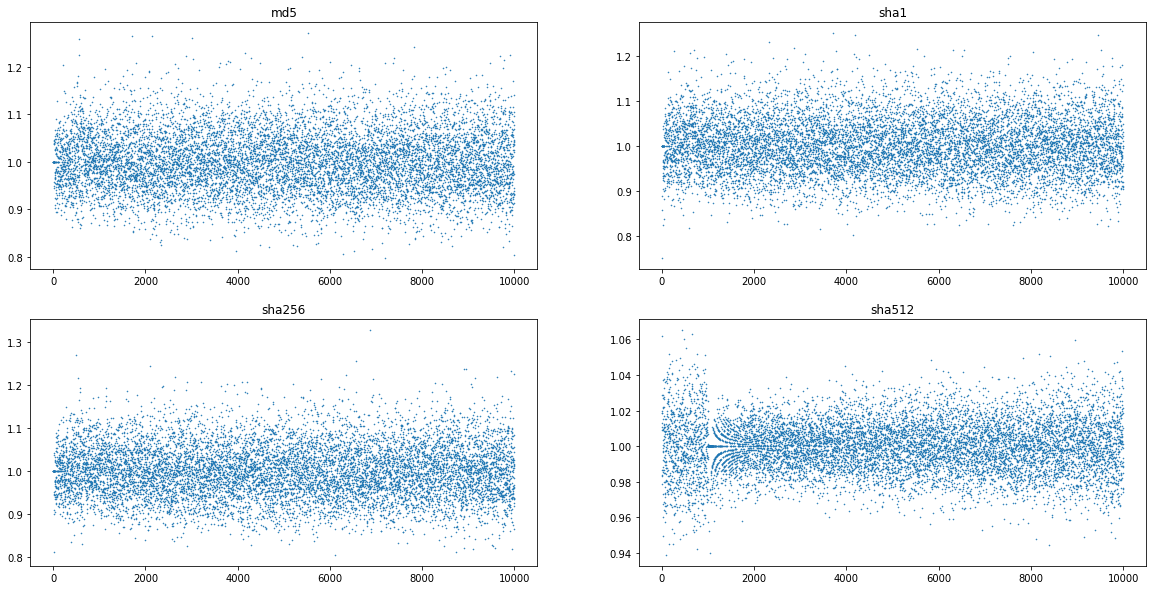

In [143]:
x = np.linspace(1, n, n)
fig, ax = plt.subplots(2, 2, figsize=(20,10))
size = 0.3

b = 5
hashes = {
    'md5': data_md5,
    'sha1': data_sha1,
    'sha256': data_sha256,
    'sha512': data_sha512
}

i, j = 0, 0

for hname, hdata in hashes.items():
    ax[i, j].scatter(x, hdata[(b - 1) * n:b * n]['estimated/n'], s=size)
    ax[i, j].set_title(hname)
    
    if j == 1:
        i = (i + 1) % 2
    j = (j + 1) % 2

# Porównanie z algorytmem MinCount

Porównano wyniki dla algorytmu MinCount - w obu przypadku dla funkcji haszującej `SHA256`. 

In [146]:
data_mc = pd.read_csv('../lab2/data/5b.csv')
data_mc['estimated/n'] = data_mc['estimated'] / data_mc['n']

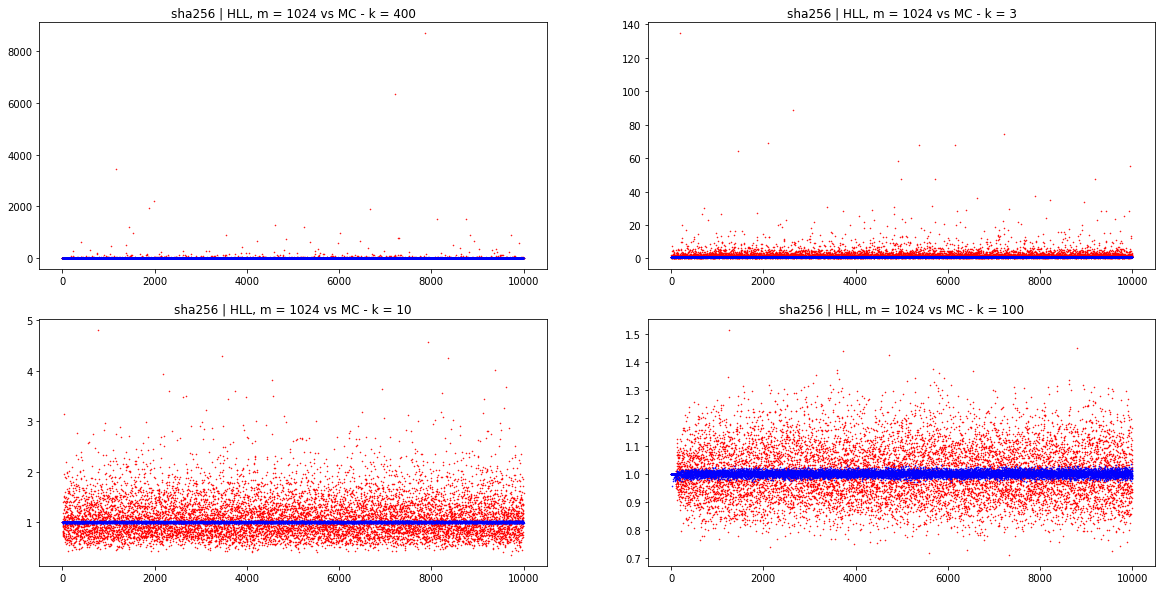

In [147]:
x = np.linspace(1, n, n)
fig, ax = plt.subplots(2, 2, figsize=(20,10))
size = 0.3

ks = [2, 3, 10, 100, 400]
i, j = 0, 0

mult = 0
for k in ks:
    ax[i, j].scatter(x, data_mc[mult * n:(mult + 1) * n]['estimated/n'], s=size, c='#f00')
    ax[i, j].scatter(x, data_sha256[9*n:10*n]['estimated/n'], s=size, c='#00f')
    ax[i, j].set_title('sha256 | HLL, m = {} vs MC - k = {}'.format(2**10, k))
    
    mult += 1
    
    if j == 1:
        i = (i + 1) % 2
    j = (j + 1) % 2